In [8]:
import copy
import numpy as np
import pywt
import matplotlib.pyplot as plt
from math import log
%matplotlib inline

In [9]:
def test_data(transitions=100):
        states = [ 163, 220, 230, 100, 40, 45 ]

        clean, noisy = [], []
        for i in range(transitions):
                length = np.random.randint(10, 100)
                state = np.random.choice(states)
                clean.append([state] * length)
                noisy.append(np.random.normal(state, 17, length))

        return np.hstack(clean), np.hstack(noisy)

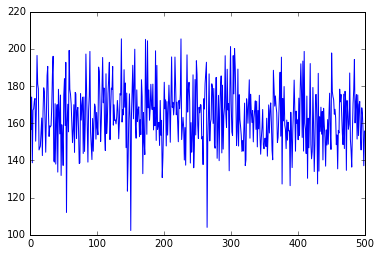

In [10]:
noisy = np.random.normal(163, 17, 500)
plt.plot(noisy)

In [11]:
level = 3
sigma = np.mean(noisy)**0.5 # Poisson shot noise
tau = sigma * (2*log(len(noisy)))**0.5
coeffs = pywt.wavedec(noisy, 'haar', level=level)
old_coeffs = copy.deepcopy(coeffs)
coeffs[1:] = [np.sign(a) * np.maximum(0, np.abs(a)-tau) for a in coeffs[1:] ]
filtered = pywt.waverec(coeffs, 'haar')

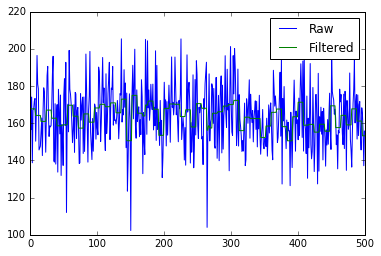

In [12]:
plt.plot(noisy, label='Raw')
plt.plot(filtered, label='Filtered')
plt.legend()

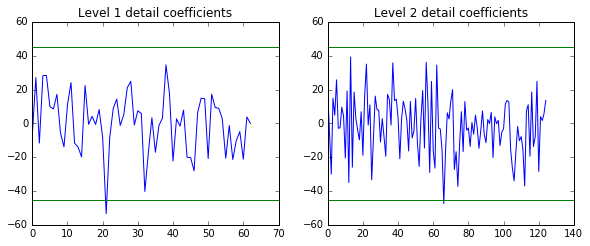

In [13]:
fig = plt.figure(figsize=(15,8))
for l in range(1,level):
    ax = fig.add_subplot(2, level, 1+l+level)
    ax.plot(old_coeffs[l])
    ax.axhline(-tau, color='g'); ax.axhline(+tau, color='g')
    ax.set_title("Level %d detail coefficients" % l)

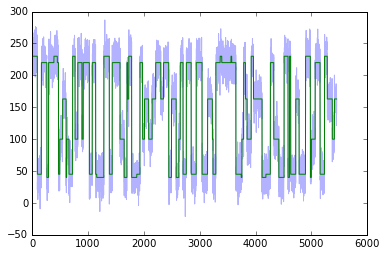

In [14]:
clean, noisy = test_data()
plt.plot(noisy, label='noisy', alpha=0.3)
plt.plot(clean, label='clean')

In [15]:
sigma = np.mean(noisy)**0.5 # Poisson shot noise
tau = sigma * (2*log(len(noisy)))**0.5
coeffs = pywt.wavedec(noisy, 'haar', level=level)
old_coeffs = copy.deepcopy(coeffs)
coeffs[1:] = [np.sign(a) * np.maximum(0, np.abs(a)-tau) for a in coeffs[1:] ]
filtered = pywt.waverec(coeffs, 'haar')

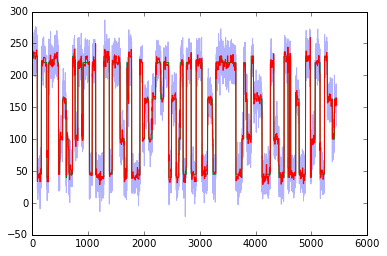

In [16]:
plt.plot(noisy, label='noisy', alpha=0.3)
plt.plot(clean, label='clean')
plt.plot(filtered, label='filtered')